In [1]:
#conda install -c conda-forge spacy-model-en_core_web_sm
import re
import pandas as pd
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing

import string 
import nltk 
import numpy as np 
import math 
from tqdm import tqdm 

from spacy.matcher import Matcher 
from spacy.tokens import Span 
from spacy import displacy
import spacy_dbpedia_spotlight


In [3]:
import multiprocessing
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
import os
import sys

def load_embedding(path):
    embedding = KeyedVectors.load_word2vec_format(path, binary=True)
    print('embedding loaded from', path)
    return embedding
w2v_model = load_embedding("data/w2v_cbow.bin")


embedding loaded from data/w2v_cbow.bin


In [4]:
read_file = pd.read_csv ('data/collagen_genes.txt',sep='\n',header=None)
read_file.columns = ['Name']
read_file.to_csv ('collagen_genes.csv', index=None)

In [5]:
genes=pd.read_csv('collagen_genes.csv')
genes=genes.dropna().reset_index(drop=True)

C:\Users\Yoshita\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Yoshita\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Yoshita\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Yoshita\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Yoshita\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will cha

KeyError: "Key 'Gene_1305' not present"

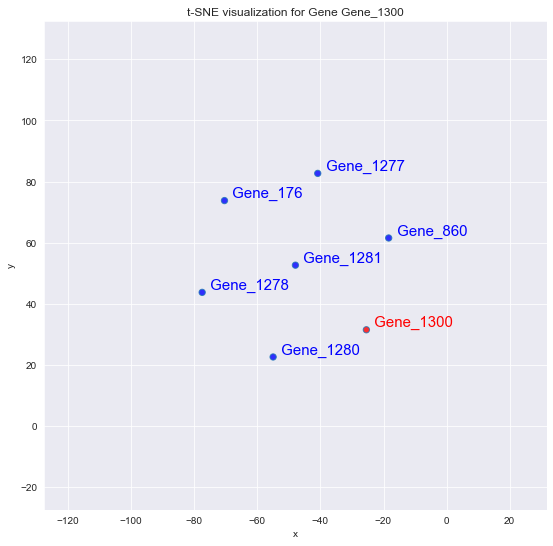

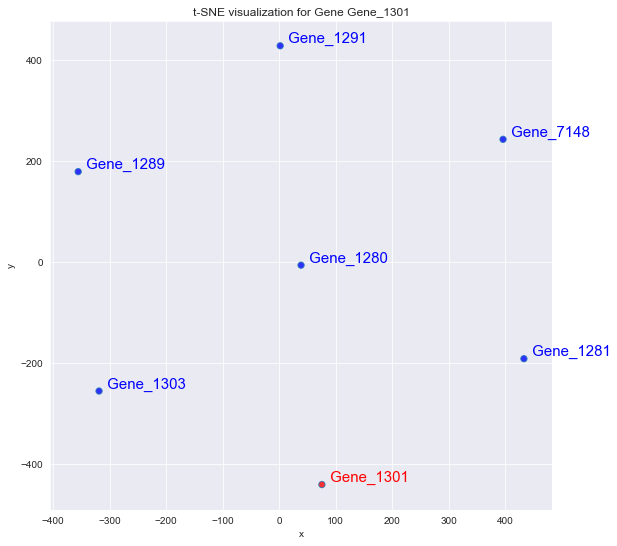

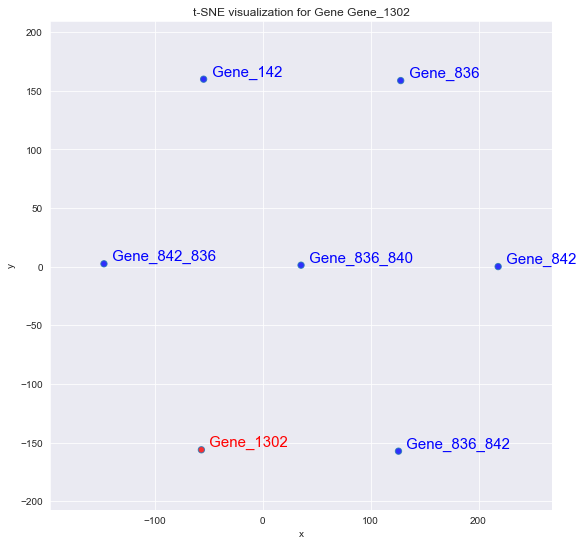

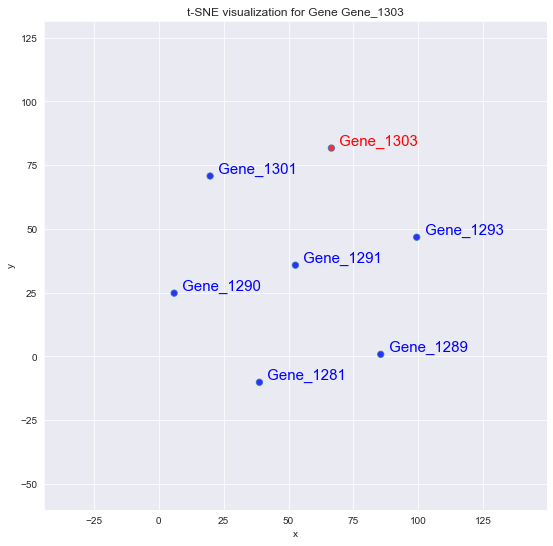

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Bluw words are proteins, red word is gene and green words are most dissimilar words
def tsnescatterplot(model, word):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = []
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays.append(model[word])
    
    close_words = model.most_similar([word],topn=6)
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays.append(wrd_vector)
    
    tsne_model = TSNE(perplexity=15, n_components=2, init='pca', n_iter=2500, random_state=0)
    Y = tsne_model.fit_transform(arrays)
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
        # Finds t-SNE coordinates for 2 dimensions
        
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
        # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for Gene {}'.format(word.title()))

# 10 Most similar words vs. 10 Most dissimilar
for i in genes['Name'].tolist():
#     for j in woundproteinlist:
    tsnescatterplot(w2v_model, i)

# print("\t    Protein\tgene\n")
# for i in woundgenelist:
#     for j in woundproteinlist:
#         print(w2v_model.wv.similarity(i,j)," ",end=' ')
#         print(j,"--",i)